[![Binder](https://mybinder.org/badge_logo.svg)](https://lab.mlpack.org/v2/gh/mlpack/examples/master?urlpath=lab%2Ftree%2Fcifar10_transformation_with_pca%2Fcifar-10-pca-py.ipynb)

In [1]:
# @file cifar-10-pca-py.ipynb
#
# Principal Component Analysis applied to the CIFAR-10 dataset.

In [2]:
import mlpack

In [3]:
import pandas as pd
import numpy as np
import glob
import os
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
# Load the CIFAR10 data from an online URL.
!wget -O - https://lab.mlpack.org/data/cifar10-images.tar.gz | tar -xz

--2020-07-21 20:26:17--  https://lab.mlpack.org/data/cifar10-images.tar.gz
Resolving lab.mlpack.org (lab.mlpack.org)... 95.216.66.112
Connecting to lab.mlpack.org (lab.mlpack.org)|95.216.66.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136154635 (130M) [application/octet-stream]
Saving to: ‘STDOUT’

-                   100%[===================>] 129.85M  29.1MB/s    in 4.4s    

2020-07-21 20:26:22 (29.5 MB/s) - written to stdout [136154635/136154635]



In [5]:
# Create a list with all train and test images.
train_images_path = glob.glob('cifar10-images/train/**/*.png', recursive=True)
test_images_path = glob.glob('cifar10-images/test/**/*.png', recursive=True)

In [6]:
# Extract the labels from the image path.
train_labels = []
for img in train_images_path:
    train_labels.append(img.split('/')[2])

test_labels = []
for img in test_images_path:
    test_labels.append(img.split('/')[2])

In [7]:
# Print the image shape of the first image from the testing data.
img = mpimg.imread(test_images_path[0])
img.shape

(32, 32, 3)

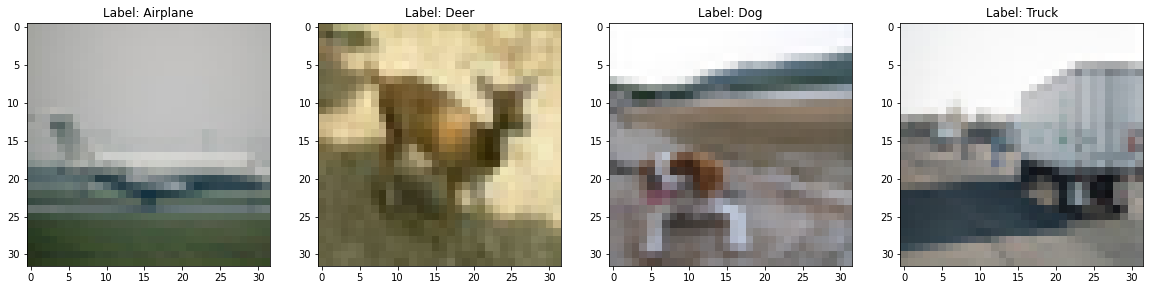

In [8]:
# Display images from the training and testing data.
plt.figure(figsize=[20,20])

# Display image number 0 from the training data.
plt.subplot(141)
plt.imshow(mpimg.imread(train_images_path[0]))
plt.title("Label: " + train_labels[0]);

# Display image number 3000 from the training data.
plt.subplot(142)
plt.imshow(mpimg.imread(train_images_path[5000]))
plt.title("Label: " + train_labels[5000]);

# Display image number 2000 from the testing data.
plt.subplot(143)
plt.imshow(mpimg.imread(test_images_path[2000]))
plt.title("Label: " + test_labels[2000]);

# Display image number 7000 from the testing data.
plt.subplot(144)
plt.imshow(mpimg.imread(test_images_path[7000]))
plt.title("Label: " + test_labels[7000]);

In [9]:
# Create Dataframe from the testing images, this can take some time.
features = ['pixel' + str(i) for i in range(img.shape[0] * img.shape[1] * img.shape[2])]
samples = {}
for c, im in enumerate(test_images_path):
    if c % 1000 == 0:
        print('Loaded images: %d' % (c))
    im = mpimg.imread(im)
    im = im.reshape(-1, img.shape[0] * img.shape[1] * img.shape[2])
    samples[str(c)] = im.tolist()[0]

cifar = pd.DataFrame.from_dict(samples, orient='index')

Loaded images: 0
Loaded images: 1000
Loaded images: 2000
Loaded images: 3000
Loaded images: 4000
Loaded images: 5000
Loaded images: 6000
Loaded images: 7000
Loaded images: 8000
Loaded images: 9000


In [10]:
# Print the first 10 rows of the data.
cifar.head(10)

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.768627,0.847059,0.921569,0.701961,0.776471,0.843137,0.552941,0.666667,0.768627,0.466667,...,0.607843,0.733333,0.682353,0.619608,0.725490,0.686275,0.623529,0.733333,0.694118,0.631373
1,0.490196,0.619608,0.756863,0.490196,0.615686,0.752941,0.494118,0.619608,0.756863,0.494118,...,0.800000,0.564706,0.650980,0.800000,0.568627,0.654902,0.803922,0.572549,0.658824,0.796078
2,0.000000,0.003922,0.011765,0.000000,0.003922,0.011765,0.000000,0.007843,0.003922,0.000000,...,0.000000,0.000000,0.007843,0.003922,0.000000,0.003922,0.011765,0.000000,0.003922,0.011765
3,0.709804,0.678431,0.623529,0.705882,0.670588,0.631373,0.635294,0.596078,0.568627,0.576471,...,0.454902,0.729412,0.639216,0.474510,0.721569,0.635294,0.482353,0.733333,0.643137,0.486275
4,0.113725,0.239216,0.396078,0.113725,0.239216,0.396078,0.117647,0.243137,0.400000,0.117647,...,0.768627,0.450980,0.615686,0.772549,0.450980,0.615686,0.768627,0.458824,0.619608,0.768627
5,0.227451,0.254902,0.525490,0.239216,0.266667,0.549020,0.247059,0.270588,0.568627,0.250980,...,0.380392,0.333333,0.305882,0.392157,0.376471,0.333333,0.423529,0.400000,0.372549,0.454902
6,0.831373,0.898039,0.996078,0.823529,0.886275,0.984314,0.827451,0.890196,0.988235,0.819608,...,0.349020,0.403922,0.372549,0.356863,0.321569,0.294118,0.305882,0.105882,0.168627,0.231373
7,0.552941,0.627451,0.674510,0.658824,0.721569,0.752941,0.768627,0.819608,0.831373,0.854902,...,0.603922,0.537255,0.541176,0.600000,0.517647,0.525490,0.611765,0.501961,0.513726,0.603922
8,0.984314,0.992157,0.972549,0.976471,0.984314,0.964706,0.980392,0.988235,0.968627,0.980392,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157
9,0.337255,0.513726,0.741176,0.341176,0.513726,0.741176,0.341176,0.517647,0.745098,0.345098,...,0.168627,0.192157,0.184314,0.168627,0.203922,0.192157,0.164706,0.196078,0.188235,0.164706


In [11]:
# Perform Principal Components Analysis using the randomized method.
# Other decomposition methods are 'exact', 'randomized-block-krylov', 'quic'.
data = mlpack.pca(decomposition_method='randomized', scale=True, input=cifar, new_dimensionality=2)

<Figure size 432x288 with 0 Axes>

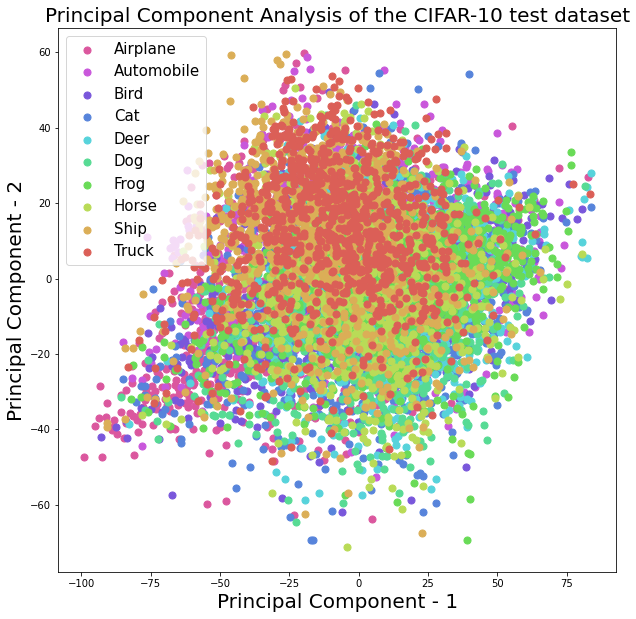

In [12]:
# Plot the transformed input.
plt.figure()
plt.figure(figsize=(10, 10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title('Principal Component Analysis of the CIFAR-10 test dataset', fontsize=20)

targets = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
colors = ['#DB579E', '#C957DB', '#7957DB', '#5784DB', '#57D3DB', '#57DB94', '#69DB57', '#B9DB57', '#DBAE57', '#DB5F57']

test_labels = np.array(test_labels)
for target, color in zip(targets, colors):
    indices = np.where(test_labels == target)
    plt.scatter(data['output'][indices,[0]], data['output'][indices,[1]], c = color, s = 50)
plt.legend(targets, prop={'size': 15})

We can observe some structure in the plot above, samples belonging to the same class
are close to each other; images that are different like a Truck and a Horse are further away.